In [26]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
#切割训练数据和样本数据
from sklearn.model_selection import train_test_split
#用于模型评分
from sklearn.metrics import r2_score

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor

df = pd.read_csv(r'final1.csv',encoding = "gbk")
data = df

In [27]:
print(df.head())

               type     space     power   control  consumption   comfort  \
0              E950  3.000000  1.300000  1.650000     0.600000  1.750000   
1          BORUI GE  1.680000  0.440000  3.120000     0.600000  0.040000   
2          BORUI GE  1.600000  1.400000  1.155556     0.666667  0.133333   
3  Rongwei MARVEL-X  5.120000  4.240000  0.840000          NaN -0.600000   
4       Rongwei RX5  3.641667  0.983333  1.850000     0.166667 -0.083333   

      cover  interior  cost performance  month  sales  
0  0.300000  0.250000          1.000000      9      0  
1       NaN       NaN               NaN      3      0  
2  1.044444  0.266667          0.244444      4      0  
3       NaN       NaN               NaN      9      0  
4       NaN       NaN               NaN      9      0  


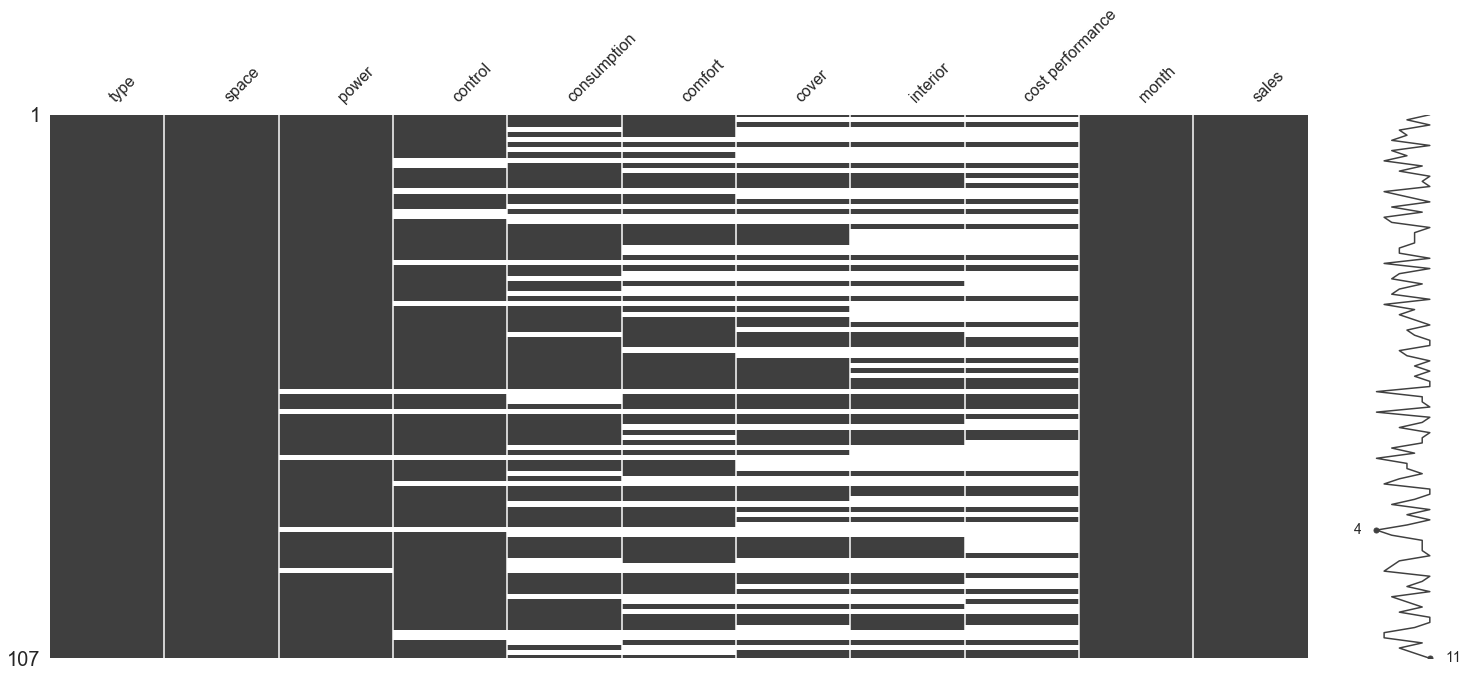

In [28]:
import missingno 
missingno.matrix(data)
#至少有一半以上是非空的列筛选出来
data = data.drop(["type"],axis = 1)
data = data.drop(["month"],axis = 1)

In [29]:
def fill(data):
    data["space"] = data["space"].fillna(data["space"].mean())
    data["power"] = data["power"].fillna(data["power"].mean())
    data["control"] = data["control"].fillna(data["control"].mean())
    data["consumption"] = data["consumption"].fillna(data["consumption"].mean())
    data["comfort"] = data["comfort"].fillna(data["comfort"].mean())
    data["cover"] = data["cover"].fillna(data["cover"].mean())
    data["interior"] = data["interior"].fillna(data["interior"].mean())
    data["cost performance"] = data["cost performance"].fillna(data["cost performance"].mean())
fill(data)
data.describe()

,space,power,control,consumption,comfort,cover,interior,cost performance,sales
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.282545,1.400686,1.208308,0.788924,0.726433,0.513333,0.132528,0.170003,1681.074766
std,1.827640,1.165882,1.678848,0.981672,0.669315,0.437140,0.460806,0.323090,1900.972282
min,-4.600000,-1.000000,-6.400000,-2.000000,-0.600000,-1.000000,-3.000000,-2.000000,0.000000
25%,1.361667,0.713077,0.646036,0.373077,0.314286,0.400000,0.132528,0.170003,128.500000
50%,2.150000,1.371429,1.208308,0.788924,0.726433,0.513333,0.132528,0.170003,1277.000000
75%,3.486111,2.000000,1.641667,0.852778,0.726433,0.513333,0.183333,0.170003,2337.500000
max,7.360000,5.640000,9.000000,4.900000,3.900000,2.400000,1.500000,1.000000,8937.000000


In [30]:
#对于连续型数据，对其进行标准化
"""data_scaled = preprocessing.scale(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['space','power','control','consumption','comfort','cover','interior','cost performance','sales']
data_scaled.describe()"""

"data_scaled = preprocessing.scale(data)\ndata_scaled = pd.DataFrame(data_scaled)\ndata_scaled.columns = ['space','power','control','consumption','comfort','cover','interior','cost performance','sales']\ndata_scaled.describe()"

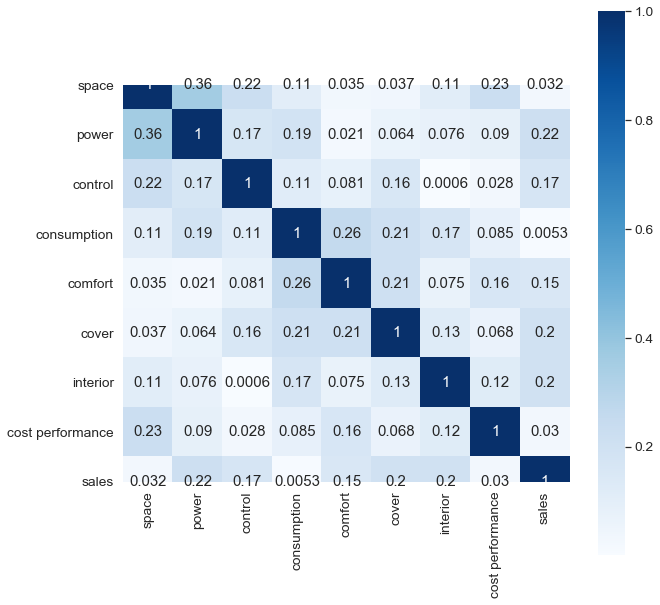

In [31]:
import seaborn as sns
def corr_heat(df):
    dfData = abs(df.corr())
    plt.subplots(figsize=(10, 10)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
   # plt.savefig('./BluesStateRelation.png')
    plt.show()
corr_heat(data)

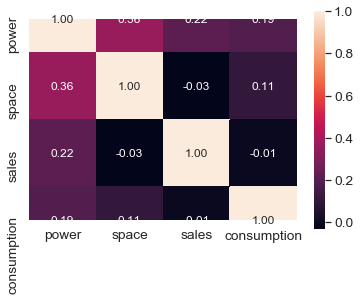

In [32]:
#取出与某个变量（这里指能力）相关性最大的前四个，做出热点图表示
k = 4 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'power')['power'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',     annot_kws={'size': 12}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()

In [33]:
X,y= data.iloc[:,:8],data.iloc[:,8]
y1 = y 
y = y/1000
X_train,x_test,y_train,y_true = train_test_split(X,y,test_size=0.2)

data_scaled = preprocessing.scale(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['space','power','control','consumption','comfort','cover','interior','cost performance','sales']

data_scaled.describe()

,space,power,control,consumption,comfort,cover,interior,cost performance,sales
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,7.885696e-17,1.867665e-16,1.494132e-16,4.980440e-17,3.320293e-17,5.810513e-17,2.127063e-17,-1.952293e-16,-8.300733e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-3.783532e+00,-2.068806e+00,-4.553189e+00,-2.854365e+00,-1.991103e+00,-3.478190e+00,-6.829916e+00,-6.748009e+00,-8.884852e-01
25%,-5.062334e-01,-5.925515e-01,-3.364916e-01,-4.256049e-01,-6.186726e-01,-2.604808e-01,6.051605e-17,-1.726217e-16,-8.205701e-01
50%,-7.286404e-02,-2.521292e-02,-1.328825e-16,-1.136274e-16,0.000000e+00,2.551696e-16,6.051605e-17,-1.726217e-16,-2.135625e-01
75%,6.616345e-01,5.164624e-01,2.593432e-01,6.535187e-02,0.000000e+00,2.551696e-16,1.107716e-01,-1.726217e-16,3.469353e-01
max,2.791222e+00,3.653255e+00,4.662935e+00,4.207540e+00,4.763828e+00,4.336246e+00,2.981527e+00,2.581021e+00,3.834917e+00


Netural Network 1
MSE均方误差： 7.064853509321926
MAE平均绝对误差： 2.340168398128363
MedAE中位绝对误差 2.223977067368416
EV解释误差： -0.24920878662651114
Variance score: -3.81


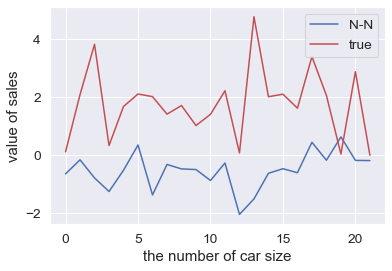

Netural Network 2
MSE均方误差： 6.643995570460601
MAE平均绝对误差： 2.266023541485478
MedAE中位绝对误差 2.074919611477852
EV解释误差： -0.3574078366925142
Variance score: -3.52


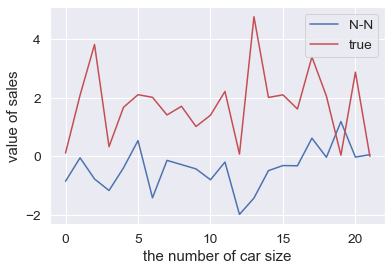

Netural Network 3
MSE均方误差： 7.559089365597313
MAE平均绝对误差： 2.4179934626876927
MedAE中位绝对误差 2.279288625468075
EV解释误差： -0.30090353792014723
Variance score: -4.14


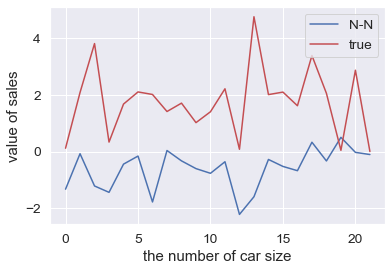

Netural Network 4
MSE均方误差： 6.819048934674439
MAE平均绝对误差： 2.2465855966677144
MedAE中位绝对误差 2.141722538447691
EV解释误差： -0.4073654442285499
Variance score: -3.64


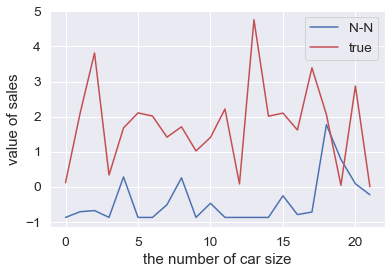

Netural Network 5
MSE均方误差： 7.476271132262505
MAE平均绝对误差： 2.3545365062578196
MedAE中位绝对误差 2.0936147587951446
EV解释误差： -1.3948004944676948
Variance score: -4.09


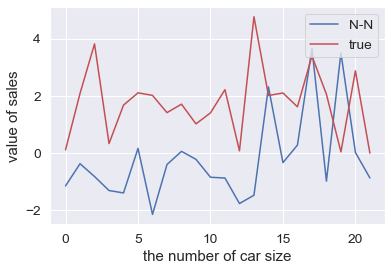

Netural Network 6
MSE均方误差： 4.707002502629477
MAE平均绝对误差： 1.7839033022736137
MedAE中位绝对误差 1.6006589250519045
EV解释误差： -1.9221191352371836
Variance score: -2.20


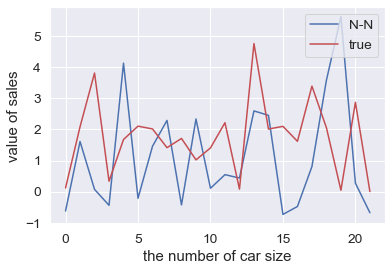

Netural Network 7
MSE均方误差： 5.666249271286357
MAE平均绝对误差： 1.953503504517338
MedAE中位绝对误差 1.9479791548315548
EV解释误差： -2.3438432447001802
Variance score: -2.86


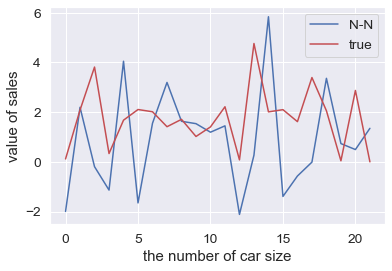

Netural Network 8
MSE均方误差： 4.8673462788214765
MAE平均绝对误差： 1.8968061749107272
MedAE中位绝对误差 1.855206027362265
EV解释误差： -1.4801985080558042
Variance score: -2.31


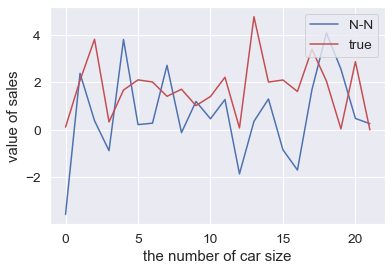

Netural Network 9
MSE均方误差： 9.675079102961927
MAE平均绝对误差： 2.713478628728565
MedAE中位绝对误差 2.825951928359916
EV解释误差： -2.8993348420843676
Variance score: -5.58


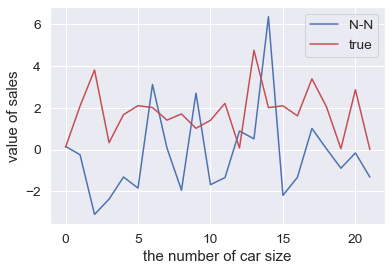

Netural Network 10
MSE均方误差： 8.018311307130082
MAE平均绝对误差： 2.39423041711033
MedAE中位绝对误差 2.4355350212956397
EV解释误差： -3.4777986676573294
Variance score: -4.46


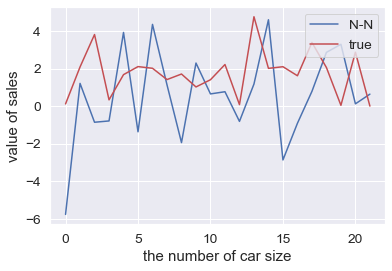

In [34]:
#神经网络数据格式化
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(X_train)
test_x_disorder = ss_x.transform(x_test)

for i in range(10):
    ss_y = preprocessing.StandardScaler()
    train_y_disorder = ss_y.fit_transform(y_train.values.reshape(-1, 1))
    test_y_disorder=ss_y.transform(y_true.values.reshape(-1, 1))
    clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(i+1), learning_rate='adaptive',activation='relu',random_state=1,warm_start=True)
    #数据训练
    clf.fit(train_x_disorder,train_y_disorder.ravel())
    y_pre_clf = clf.predict(x_test)

    
    
    print("Netural Network",i+1)
    print("MSE均方误差：",mean_squared_error(y_true,y_pre_clf))
    print("MAE平均绝对误差：",mean_absolute_error(y_true,y_pre_clf))
    print("MedAE中位绝对误差",median_absolute_error(y_true,y_pre_clf))
    print("EV解释误差：",explained_variance_score(y_true,y_pre_clf))
    print('Variance score: %.2f' % r2_score(y_true, y_pre_clf))
    
    plt.figure()  
    plt.plot(range(len(y_pre_clf)),y_pre_clf,'b',label="N-N")  
    plt.plot(range(len(y_pre_clf)),y_true,'r',label="true")  
    plt.legend(loc="upper right") #显示图中的标签  
    plt.xlabel("the number of car size")  
    plt.ylabel('value of sales')  
    plt.show()

In [35]:
#X_train,x_test,y_train,y_true
data_scaled = preprocessing.scale(X_train)
X_train = pd.DataFrame(data_scaled)
X_train.columns = ['space','power','control','consumption','comfort','cover','interior','cost performance']
X_train.describe()

,space,power,control,consumption,comfort,cover,interior,cost performance
count,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01
mean,7.396045e-17,2.024524e-17,-1.697988e-17,1.511863e-16,2.028606e-17,7.008283e-17,1.840848e-17,-1.774724e-16
std,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00
min,-3.726841e+00,-2.105482e+00,-4.288493e+00,-2.841113e+00,-1.940267e+00,-3.229902e+00,-6.167631e+00,-6.493303e+00
25%,-6.532512e-01,-4.903899e-01,-3.428509e-01,-4.496969e-01,-5.655587e-01,-4.070253e-02,2.333353e-02,5.605278e-02
50%,-3.853339e-02,-6.478236e-02,-5.374452e-02,-6.216372e-02,1.343859e-02,-1.235447e-02,2.333353e-02,5.605278e-02
75%,6.334376e-01,4.446635e-01,3.126947e-01,2.552044e-02,1.343859e-02,-1.235447e-02,8.370852e-02,5.605278e-02
max,2.760241e+00,3.538840e+00,4.283075e+00,4.034209e+00,4.687791e+00,3.998950e+00,2.725933e+00,2.561092e+00


In [36]:
data_scaled = preprocessing.scale(x_test)
x_test = pd.DataFrame(data_scaled)
x_test.columns = ['space','power','control','consumption','comfort','cover','interior','cost performance']
x_test.describe()

,space,power,control,consumption,comfort,cover,interior,cost performance
count,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,5.551115e-17,8.831320e-17,-1.488708e-16,1.362546e-16,1.009294e-16,-1.614870e-16,4.541821e-17,-7.632783e-17
std,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00
min,-1.934214e+00,-2.014511e+00,-2.158194e+00,-3.092900e+00,-1.503182e+00,-1.689822e+00,-1.520308e+00,-1.073941e+00
25%,-5.219673e-01,-5.474856e-01,-5.407732e-01,-4.327047e-01,-7.343259e-01,-6.894161e-01,-2.577552e-01,-2.668161e-01
50%,-3.467947e-01,1.088079e-01,2.947253e-01,2.750451e-01,-5.749178e-02,8.780678e-02,-2.577552e-01,-2.668161e-01
75%,6.609608e-01,3.718317e-01,3.861232e-01,2.926008e-01,2.159710e-01,8.780678e-02,2.365127e-01,-2.668161e-01
max,1.999728e+00,2.117353e+00,1.999004e+00,1.936153e+00,2.780669e+00,2.251945e+00,2.868075e+00,2.819447e+00


In [37]:
data_scaled = preprocessing.scale(y_train)
y_train = pd.DataFrame(data_scaled)
y_train.columns = ['sales']
y_train.describe()


,sales
count,8.500000e+01
mean,1.358391e-16
std,1.005935e+00
min,-8.169790e-01
25%,-7.539464e-01
50%,-3.092711e-01
75%,4.599236e-01
max,3.583977e+00


In [38]:
data_scaled = preprocessing.scale(y_true)
y_true = pd.DataFrame(data_scaled)
y_true.columns = ['sales']
y_true.describe()

,sales
count,2.200000e+01
mean,3.330669e-16
std,1.023533e+00
min,-1.456885e+00
25%,-5.353133e-01
50%,7.817393e-02
75%,2.790266e-01
max,2.471908e+00


E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 1
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


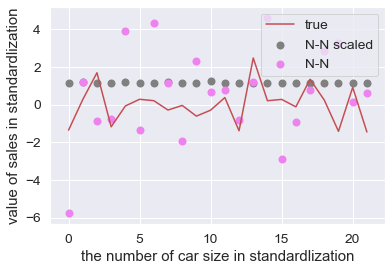

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 2
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


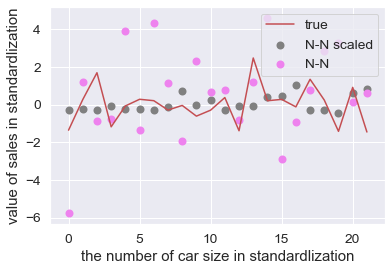

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 3
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


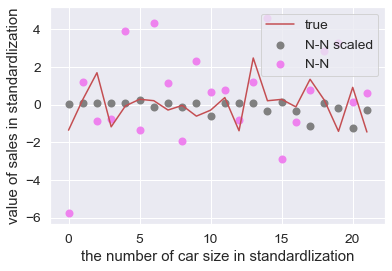

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 4
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


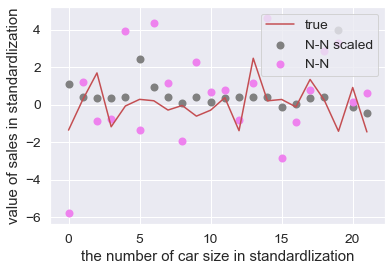

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 5
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


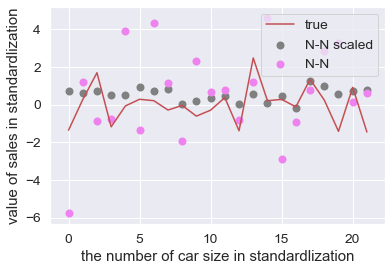

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 6
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


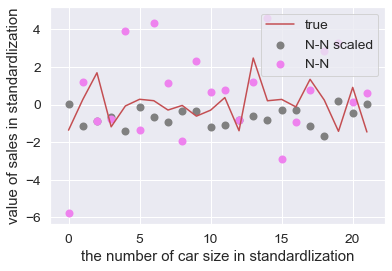

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 7
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


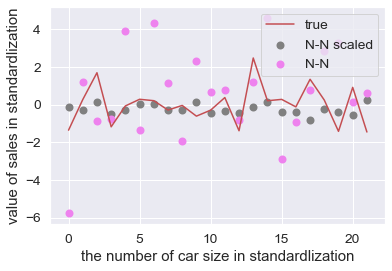

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 8
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


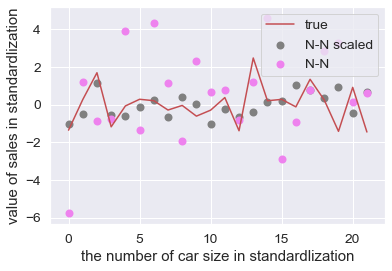

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 9
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


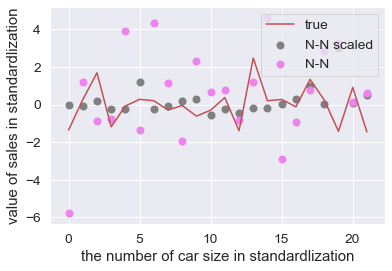

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Netural Network 10
MSE均方误差： 6.565724186787227
MAE平均绝对误差： 2.1211652587653296
MedAE中位绝对误差 1.774227584560259
EV解释误差： -5.243728825711325
Variance score: -5.57


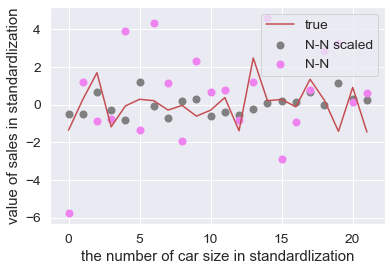

In [39]:
#神经网络数据格式化
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(X_train)
test_x_disorder = ss_x.transform(x_test)

for i in range(10):
    ss_y = preprocessing.StandardScaler()
    train_y_disorder = ss_y.fit_transform(y_train.values.reshape(-1, 1))
    test_y_disorder=ss_y.transform(y_true.values.reshape(-1, 1))
    clf = MLPRegressor(solver='adam', hidden_layer_sizes=(i+1), learning_rate='adaptive',activation='relu',random_state=100,warm_start=True)
    #数据训练
    clf.fit(train_x_disorder,train_y_disorder.ravel())
    y_pre_clf_scaled = clf.predict(x_test)

    
    
    print("Netural Network",i+1)
    print("MSE均方误差：",mean_squared_error(y_true,y_pre_clf))
    print("MAE平均绝对误差：",mean_absolute_error(y_true,y_pre_clf))
    print("MedAE中位绝对误差",median_absolute_error(y_true,y_pre_clf))
    print("EV解释误差：",explained_variance_score(y_true,y_pre_clf))
    print('Variance score: %.2f' % r2_score(y_true, y_pre_clf))
    
    plt.figure()  
    plt.plot(range(len(y_pre_clf)),y_true,'r',label="true") 
    plt.scatter(range(len(y_pre_clf)),y_pre_clf_scaled,color="grey",label="N-N scaled",linewidth=2) 
    plt.scatter(range(len(y_pre_clf)),y_pre_clf,color="violet",label="N-N",linewidth=2) 
    plt.legend(loc="upper right") #显示图中的标签  
    plt.xlabel("the number of car size in standardlization")  
    plt.ylabel('value of sales in standardlization')  
    plt.show()

In [40]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
    
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
huber=HuberRegressor()
decision = DecisionTreeRegressor()
svr = SVR()

knn.fit(X_train,y_train)
lin =linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
huber.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

y_pre_knn = knn.predict(x_test)
y_pre_linear = linear.predict(x_test)
y_pre_ridge = ridge.predict(x_test)
y_pre_huber=huber.predict(x_test)
y_pre_decision = decision.predict(x_test)
y_pre_svr = svr.predict(x_test)

knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
huber_score=r2_score(y_true,y_pre_huber)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
#解释方差
linear_EV=explained_variance_score(y_true, y_pre_linear)
knn_EV=explained_variance_score(y_true, y_pre_knn)
ridge_EV=explained_variance_score(y_true, y_pre_ridge)
huber_EV=explained_variance_score(y_true, y_pre_huber)
decision_EV=explained_variance_score(y_true, y_pre_decision)
svr_EV=explained_variance_score(y_true, y_pre_svr)

linear_MAE=mean_absolute_error(y_true, y_pre_linear)
knn_MAE=mean_absolute_error(y_true, y_pre_knn)
ridge_MAE=mean_absolute_error(y_true, y_pre_ridge)
huber_MAE=mean_absolute_error(y_true, y_pre_huber)
decision_MAE=mean_absolute_error(y_true, y_pre_decision)
svr_MAE=mean_absolute_error(y_true, y_pre_svr)

linear_medAE=median_absolute_error(y_true, y_pre_linear)
knn_medAE=median_absolute_error(y_true, y_pre_knn)
ridge_medAE=median_absolute_error(y_true, y_pre_ridge)
huber_medAE=median_absolute_error(y_true, y_pre_huber)
decision_medAE=median_absolute_error(y_true, y_pre_decision)
svr_medAE=median_absolute_error(y_true, y_pre_svr)

linear_MSE=mean_squared_error(y_true, y_pre_linear)
knn_MSE=mean_squared_error(y_true, y_pre_knn)
ridge_MSE=mean_squared_error(y_true, y_pre_ridge)
huber_MSE=mean_squared_error(y_true, y_pre_huber)
decision_MSE=mean_squared_error(y_true, y_pre_decision)
svr_MSE=mean_squared_error(y_true, y_pre_svr)


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


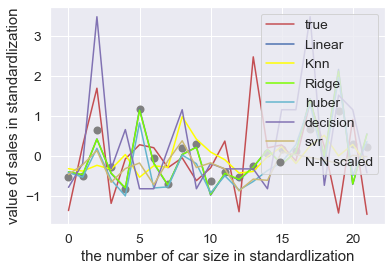

In [53]:
plt.figure()  
plt.plot(range(len(y_pre_clf)),y_true,'r',label="true") 
plt.plot(range(len(y_pre_linear)),y_pre_linear,'b',label="Linear")  
plt.plot(range(len(y_pre_knn)),y_pre_knn,'yellow',label="Knn")
plt.plot(range(len(y_pre_linear)),y_pre_ridge,'lawngreen',label="Ridge") 
plt.plot(range(len(y_pre_linear)),y_pre_huber,'c',label="huber") 
plt.plot(range(len(y_pre_linear)),y_pre_decision,'m',label="decision")  
plt.plot(range(len(y_pre_linear)),y_pre_svr,'y',label="svr")  
plt.scatter(range(len(y_pre_clf)),y_pre_clf_scaled,color="grey",label="N-N scaled",linewidth=2) 
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of car size in standardlization")  
plt.ylabel('value of sales in standardlization')  
plt.show()



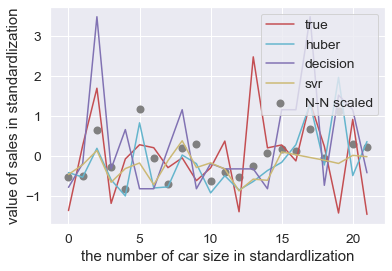

In [42]:
plt.figure()  
plt.plot(range(len(y_pre_clf)),y_true,'r',label="true") 
plt.plot(range(len(y_pre_linear)),y_pre_huber,'c',label="huber") 
plt.plot(range(len(y_pre_linear)),y_pre_decision,'m',label="decision")  
plt.plot(range(len(y_pre_linear)),y_pre_svr,'y',label="svr")  
plt.scatter(range(len(y_pre_clf)),y_pre_clf_scaled,color="grey",label="N-N scaled",linewidth=2) 
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of car size in standardlization")  
plt.ylabel('value of sales in standardlization')  
plt.show()


In [43]:
print("Linear中位绝对误差：",linear_MSE)
print("knn中位绝对误差",knn_MSE)
print("ridge中位绝对误差",ridge_MSE)
print("huber中位绝对误差",huber_MSE)
print("decison中位绝对误差：",decision_MSE)
print("svr中位绝对误差：",svr_MSE)

Linear中位绝对误差： 1.5984555850692634
knn中位绝对误差 1.0753809409177664
ridge中位绝对误差 1.5758038424409535
huber中位绝对误差 1.6067252715505185
decison中位绝对误差： 1.684752744546204
svr中位绝对误差： 1.0166187006198768
